---
title: PyTorch 02 - Dataloaders
jupyter: python3
---

### Datasets & DataLoaders

::: {.callout-note}
Adapted from [PyTorch Quickstart](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
to use CIFAR10 dataset instead of FashionMNIST.
:::

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/trgardos/ml-549-fa24/blob/main/11-pytorch-02-dataloaders.ipynb)

* Code for processing data samples can get messy and hard to maintain
* We ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. 

PyTorch provides two data primitives: 

1. `torch.utils.data.DataLoader` and 
2. `torch.utils.data.Dataset`

that allow you to use pre-loaded datasets as well as your own data.

* `Dataset` stores the samples and their corresponding labels, and
* `DataLoader` wraps an iterable around the `Dataset` to enable easy
   access to the samples.

::: {.callout-note}
An **iterable** is a Python object capable of returning its members one at a time.
It must implement the `__iter__` method or the `__getitem__` method. See
[Iterators](https://docs.python.org/3/tutorial/classes.html#iterators)
for more details.
:::

PyTorch provides a number of pre-loaded datasets (such as FashionMNIST or CIFAR10)
that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. 

They can be used to prototype and benchmark your model. 

You can find them here:

* [Image Datasets](https://pytorch.org/vision/stable/datasets.html)
    <details>
    <summary>View sublist</summary>
    <ul>
        <li>image classification</li>
        <li>object detection or segmentation</li>
        <li>optical flow</li>
        <li>stereo matching</li>
        <li>image pairs</li>
        <li>image captioning</li>
        <li>video classification</li>
        <li>video prediction</li>
    </ul>
    </details>
* [Text Datasets](https://pytorch.org/text/stable/datasets.html)
    <details>
    <summary>View sublist</summary>
    <ul>
        <li>text classification</li>
        <li>language modeling</li>
        <li>machine translation</li>
        <li>sequence tagging</li>
        <li>question answering</li>
        <li>unsupervised learning</li>
    </ul>
    </details>
* [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)


### Loading a Dataset

Here is an example of how to load the
[CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10)
dataset from TorchVision.

We load the
[CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) 
with the following parameters:

- `root` is the path where the train/test data is stored,
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it's
   not available at `root`.
- `transform` and `target_transform` specify the feature and label
   transformations. More on that later.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In this case we use simply the [ToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html)
transform which converts the image from
a (H x W x C) shape to a (C x H x W) shape and converts the pixel values from
[0,255] to a torch.FloatTensor in the range [0.0, 1.0].

In [2]:
img, label = training_data[0]
print(f"img.shape: {img.shape}")
print(f"img.dtype: {img.dtype}")

img.shape: torch.Size([3, 32, 32])
img.dtype: torch.float32


### Iterating and Visualizing the Dataset

It's very important to understand the data you're working with. Visually inspecting
the dataset is a good way to get started.

We can index `Datasets` manually like a list: `training_data[index]`. In this
case we randomly sample images from the dataset.

We use `matplotlib` to visualize some samples in our training data.

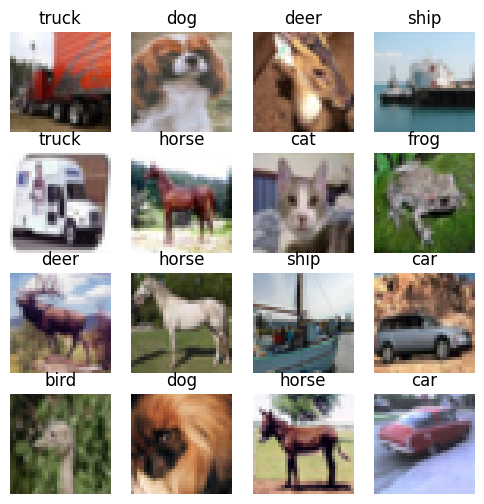

In [27]:
labels_map = {
    0: "plane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

figure = plt.figure(figsize=(6, 6))
cols, rows = 4, 4

for i in range(1, cols * rows + 1):
    # Randomly choose indices
    sample_idx = torch.randint(len(training_data), size=(1,)).item()

    img, label = training_data[sample_idx]
    #print(f"img.shape: {img.shape}")
    #print(f"label: {label}")
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

::: {.callout-tip}
Try re-running the above cell a few times to see different samples from the dataset.
:::


### Collecting Sample Data to Illustrate Custom Dataset

To illustrate creating a custom dataset, we will collect images from the CIFAR10
dataset and save them to a local directory. We will also save the labels to a CSV
file.

In [4]:
import os
import pandas as pd
from torchvision import datasets
from torchvision.transforms import ToTensor
from PIL import Image

# Create directories to store images and annotations
os.makedirs('cifar10_images', exist_ok=True)
annotations_file = 'cifar10_annotations.csv'

# Load CIFAR10 dataset
cifar10 = datasets.CIFAR10(root='data', train=True, download=True, transform=ToTensor())

# Number of images to download
n_images = 10

# Store images and their labels
data = []
for i in range(n_images):
    img, label = cifar10[i]
    img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    img = (img * 255).byte().numpy()  # Convert to numpy array and scale to [0, 255]
    img = Image.fromarray(img)  # Convert to PIL Image

    img_filename = f'cifar10_images/img_{i}.png'
    img.save(img_filename)  # Save image

    data.append([img_filename, label])  # Append image path and label to data list

# Write annotations to CSV file
df = pd.DataFrame(data, columns=['image_path', 'label'])
df.to_csv(annotations_file, index=False)

print(f"Saved {n_images} images and their labels to {annotations_file}")

Files already downloaded and verified
Saved 10 images and their labels to cifar10_annotations.csv


In [5]:
# List the directory `cifar_images
import os
os.listdir('cifar10_images')

['img_1.png',
 'img_0.png',
 'img_2.png',
 'img_3.png',
 'img_7.png',
 'img_6.png',
 'img_4.png',
 'img_5.png',
 'img_8.png',
 'img_9.png']

In [6]:
import pandas as pd

# Read the annotations file
annotations = pd.read_csv('cifar10_annotations.csv')

# Display the first 10 lines of the annotations file
print(annotations.head(10))

                 image_path  label
0  cifar10_images/img_0.png      6
1  cifar10_images/img_1.png      9
2  cifar10_images/img_2.png      9
3  cifar10_images/img_3.png      4
4  cifar10_images/img_4.png      1
5  cifar10_images/img_5.png      1
6  cifar10_images/img_6.png      2
7  cifar10_images/img_7.png      7
8  cifar10_images/img_8.png      8
9  cifar10_images/img_9.png      3


### Creating a Custom Dataset for your files

A custom Dataset class must implement three functions:

1. `__init__`, 
2. `__len__`, and 
3. `__getitem__`. 

We'll look at an example implementation.

The CIFAR10 images are stored in a directory and their labels are stored
separately in a CSV file.

In the next sections, we'll break down what's happening in each of
these functions.

In [7]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        img_path = self.img_labels.iloc[idx, 0]
        print(f"img_path: {img_path}")

        image = read_image(img_path)
        print(f"image.shape: {image.shape}")
        print(f"image.dtype: {image.dtype}")

        label = self.img_labels.iloc[idx, 1]
        print(f"label: {label}")

        if self.transform:
            print(self.transform)

            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Let's try to use it.

In [8]:
from torchvision.transforms import ToTensor

mydataset = CustomImageDataset(annotations_file='cifar10_annotations.csv', img_dir='cifar10_images') # , transform=ToTensor())

img, label = mydataset[0]
print(f"img.shape: {img.shape}")
print(f"label: {label}")

img_path: cifar10_images/img_0.png
image.shape: torch.Size([3, 32, 32])
image.dtype: torch.uint8
label: 6
img.shape: torch.Size([3, 32, 32])
label: 6


img_path: cifar10_images/img_8.png
image.shape: torch.Size([3, 32, 32])
image.dtype: torch.uint8
label: 8
img_path: cifar10_images/img_3.png
image.shape: torch.Size([3, 32, 32])
image.dtype: torch.uint8
label: 4
img_path: cifar10_images/img_2.png
image.shape: torch.Size([3, 32, 32])
image.dtype: torch.uint8
label: 9
img_path: cifar10_images/img_4.png
image.shape: torch.Size([3, 32, 32])
image.dtype: torch.uint8
label: 1


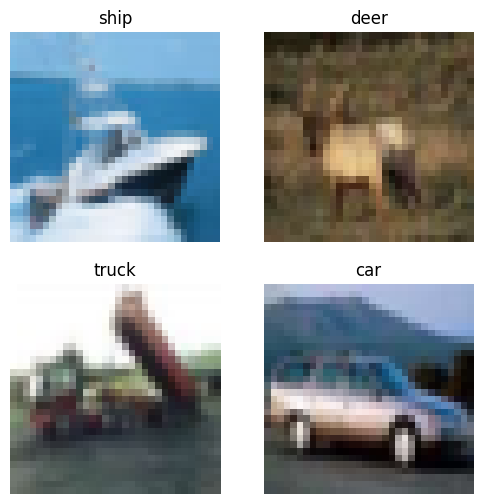

In [9]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(6, 6))
cols, rows = 2, 2

for i in range(1, cols * rows + 1):
    # Randomly choose indices
    sample_idx = torch.randint(len(mydataset), size=(1,)).item()

    img, label = mydataset[sample_idx]
    #print(f"img.shape: {img.shape}")
    #print(f"label: {label}")
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

### `__init__`

The `__init__` function is run once when instantiating the Dataset
object. We initialize the directory containing the images, the
annotations file, and both transforms (covered in more detail in the
next section).

The labels.csv file looks like: :

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

In [10]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### `__len__`

The [\_\_len\_\_]() function returns the number of samples in our dataset.

Example:

In [11]:
def __len__(self):
    return len(self.img_labels)

### `__getitem__`

The [\_\_getitem\_\_]() function loads and returns a sample from the dataset
at the given index `idx`. Based on the index, it identifies the image\'s
location on disk, converts that to a tensor using `read_image`,
retrieves the corresponding label from the csv data in
`self.img_labels`, calls the transform functions on them (if
applicable), and returns the tensor image and corresponding label in a
tuple.

In [12]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

------------------------------------------------------------------------

### Preparing your data for training with DataLoaders

The `Dataset` retrieves our dataset's features and labels one sample at
a time. While training a model, we typically want to pass samples in
"minibatches", reshuffle the data at every epoch to reduce model
overfitting, and use Python's `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


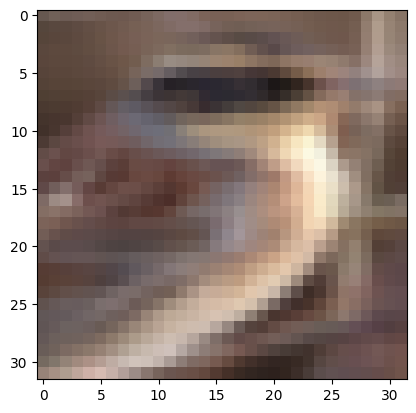

Label: 2


In [14]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")

------------------------------------------------------------------------

### Further Reading

-   [torch.utils.data API](https://pytorch.org/docs/stable/data.html)


## References

- [PyTorch](https://pytorch.org/)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Documentation](https://pytorch.org/docs/)
- [PyTorch GitHub](https://github.com/pytorch/pytorch)
- [PyTorch Brand Guidelines](https://pytorch.org/assets/brand-guidelines/PyTorch-Brand-Guidelines.pdf)